In [1]:
from double_sdes import crypte_double_sdes, decrypte_double_sdes, cassage_astucieux, cassage_brutal
import matplotlib.pyplot as plt
import numpy as np

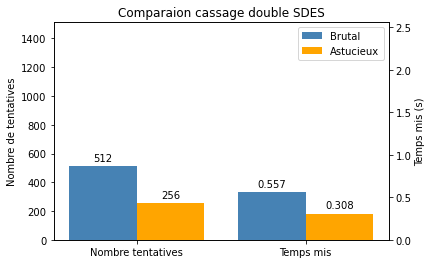

In [2]:
a = crypte_double_sdes("Je m'appelle Baptiste", 0b00000000, 0b11111111)
b = decrypte_double_sdes(a, 0b00000000, 0b11111111)

res_brutal = cassage_brutal("Je m'appelle Baptiste", a)
res_astucieux = cassage_astucieux("Je m'appelle Baptiste", a)

# Données
categories = ['Nombre tentatives', 'Temps mis']
tentatives = [res_astucieux[2], res_brutal[2]]
temps = [res_astucieux[3], res_brutal[3]]

# Création du graphique
fig, ax = plt.subplots()

ax.set_ylim(0, max(tentatives) + 1000)
ax.set_title("Comparaion cassage double SDES")
ax.set_ylabel("Nombre de tentatives")
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)

# Création des barres
barres1 = ax.bar(np.arange(1) -0.2, tentatives[0], 0.4, label="Brutal", color="steelblue")
barres2 = ax.bar(np.arange(1) +0.2, tentatives[1], 0.4, label="Astucieux", color="orange")

ax.legend()
axe2 = ax.twinx()
axe2.set_ylabel("Temps mis (s)")
axe2.set_ylim(0, max(temps) + 2)
bar1 = axe2.bar(np.arange(1) + 1 -0.2, temps[0], 0.4, color="steelblue")
bar2 = axe2.bar(np.arange(1) + 1 +0.2, temps[1], 0.4, color="orange")

# Ajout des valeurs au dessus des barres
def ajouter_valeur(barres, axe):
    for barre in barres:
        hauteur = barre.get_height()
        axe.annotate('{}'.format(hauteur),
                    xy=(barre.get_x() + barre.get_width() / 2, hauteur),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ajouter_valeur(barres1, ax)
ajouter_valeur(barres2, ax)
ajouter_valeur(bar1, axe2)
ajouter_valeur(bar2, axe2)

# Affichage du graphique
plt.show()
